In [1]:
#!pip install neuralprophet[live]
#!pip install pandas
#!pip install pytrends

In [2]:
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrends = TrendReq(hl='en-GB', tz=360)

df =  pd.read_csv("datos/datos.csv")
df = df[['brand']]
df = df.drop_duplicates()
#keywords = df['brand']
keywords = ['apple','samsung','smartphone']
pytrends.build_payload(keywords, cat=0, timeframe="2019-10-01 2020-10-01", geo="ES")

df_pytrends = pytrends.interest_over_time()
df_pytrends = df_pytrends.drop(labels=['isPartial'],axis='columns')
df_pytrends.to_csv('search_trends.csv')
df_pytrends_historical =  pytrends.get_historical_interest(keywords)
df_pytrends_historical = df_pytrends_historical.drop(labels=['isPartial'],axis='columns')
df_pytrends_historical.to_csv('historical_trend.csv')

C:\Users\Jose Rodriguez\AppData\Local\Programs\Python\Python310\lib\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\Jose Rodriguez\AppData\Local\Programs\Python\Python310\lib\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\Jose Rodriguez\AppData\Local\Programs\Python\Python310\lib\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(week_df)
C:\Users\Jose Rodriguez\AppData\Local\Programs\Python\Python310\lib\site-packages\pytrends\request.py:589: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

In [3]:
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
from neuralprophet import set_random_seed 
set_random_seed(0)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Jose Rodriguez\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\random.py:42: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  return default_generator.manual_seed(seed)



<AxesSubplot:xlabel='date'>

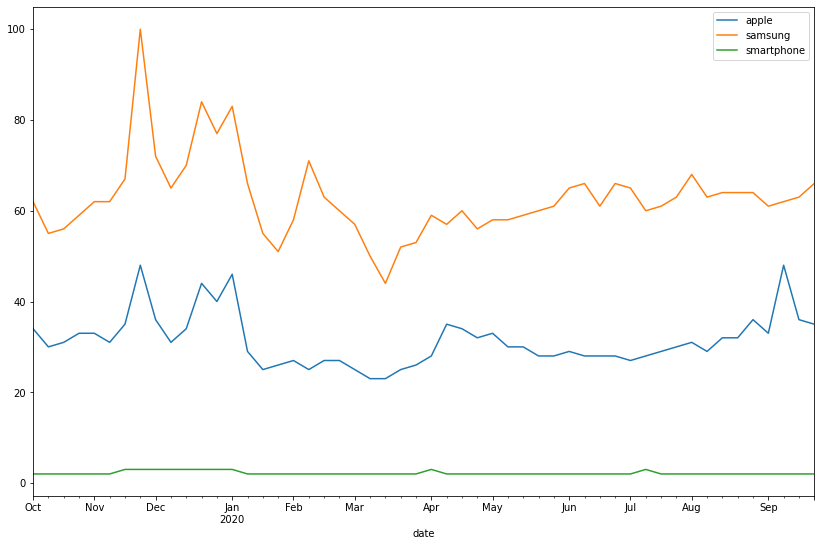

In [4]:
df_pytrends.plot(figsize=(14,9))

Transformando el dataset para el modelo

In [5]:
df_pytrends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2019-10-06 to 2020-09-27
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   apple       52 non-null     int32
 1   samsung     52 non-null     int32
 2   smartphone  52 non-null     int32
dtypes: int32(3)
memory usage: 1.0 KB


In [6]:
df_pytrends['date'] = df_pytrends.index

In [7]:
FORECAST_WEEKS = 48
TARGET_TERM = 'apple'

##df_neural = df_pytrends.rename(columns={'date': 'ds', TARGET_TERM: 'y'})[['ds', 'y']]
df_neural = df_pytrends.rename(columns = {'date': 'ds', TARGET_TERM:'y'})[['ds', 'y']]
df_neural.head()

,ds,y
date,,
2019-10-06,2019-10-06,34
2019-10-13,2019-10-13,30
2019-10-20,2019-10-20,31
2019-10-27,2019-10-27,33
2019-11-03,2019-11-03,33


In [9]:
import numpy as np

In [10]:
model = NeuralProphet(weekly_seasonality=True)
metrics = model.fit(df_neural, freq="W")

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


RuntimeError: Numpy is not available

In [ ]:
future = model.make_future_dataframe(data, periods=FORECAST_WEEKS, n_historic_predictions=True)
future.head()

In [ ]:
forecast = model.predict(future)

In [ ]:
ax = model.plot(forecast, ylabel='Google Searches', xlabel='Year', figsize=(14,9))